# Predicting the Auction Price of IPL Players

## Overview 

The Indian Premier League (IPL) is a professional league for Twenty20(T20) cricket championships that was started in 2008 in India. It was initiated by the Board of Control for Cricket in India (BCCI) with eight franchises comprising players across the world. The first IPL auction was held ing 2008 for ownership of teams for 10 years, with a base price of USD 50 million. The franchises acquire players through English auction that is conducted every year. However, there are several rules imposed by the IPL. For example, there is a maximum cap on the money a franchise can spend on buying players.

The performance of the players could be measured through several metrics. Although the IPL follows the Twenty20 format of the game, it is possible that performance of the players in the other formats of the game such as Test and One-Day matches can influence player pricing. A few players have excellent records in Test matches, but their records in Twenty20 matches are not very impressive.

The dataset consists of the performance of 130 players measured through various performance metrics such as batting strike rate, economy rate and so on in the year 2013.

## Importing Libraries

In [1]:
# Import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sn # Statistical data visualization
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Importing the Data

In [2]:
# Importing the dataset
ipl_auction_df = pd.read_csv('IPL IMB381IPL2013.csv')

## Exploring the Data

In [3]:
# Type of variable ipl_auction_df
type(ipl_auction_df)

pandas.core.frame.DataFrame

In [4]:
# Printing maximum  of 7 columns using display.max_columns
pd.set_option('display.max_columns',7)

In [5]:
# First 5 rows
ipl_auction_df.head(5)

,Sl.NO.,PLAYER NAME,AGE,...,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,...,2009,50000,50000
1,2,Abdur Razzak,2,...,2008,50000,50000
2,3,"Agarkar, AB",2,...,2008,200000,350000
3,4,"Ashwin, R",1,...,2011,100000,850000
4,5,"Badrinath, S",2,...,2011,100000,800000


In [6]:
# Summary of the DataFrame ipl_auction_df
list(ipl_auction_df.columns)

['Sl.NO.',
 'PLAYER NAME',
 'AGE',
 'COUNTRY',
 'TEAM',
 'PLAYING ROLE',
 'T-RUNS',
 'T-WKTS',
 'ODI-RUNS-S',
 'ODI-SR-B',
 'ODI-WKTS',
 'ODI-SR-BL',
 'CAPTAINCY EXP',
 'RUNS-S',
 'HS',
 'AVE',
 'SR-B',
 'SIXERS',
 'RUNS-C',
 'WKTS',
 'AVE-BL',
 'ECON',
 'SR-BL',
 'AUCTION YEAR',
 'BASE PRICE',
 'SOLD PRICE']

In [7]:
#Dimensions of the DataFrame
ipl_auction_df.shape

(130, 26)

*IPL dataset contains 130 records and 26 columns.*

In [8]:
# Detailed Summary of the Dataset
ipl_auction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
Sl.NO.           130 non-null int64
PLAYER NAME      130 non-null object
AGE              130 non-null int64
COUNTRY          130 non-null object
TEAM             130 non-null object
PLAYING ROLE     130 non-null object
T-RUNS           130 non-null int64
T-WKTS           130 non-null int64
ODI-RUNS-S       130 non-null int64
ODI-SR-B         130 non-null float64
ODI-WKTS         130 non-null int64
ODI-SR-BL        130 non-null float64
CAPTAINCY EXP    130 non-null int64
RUNS-S           130 non-null int64
HS               130 non-null int64
AVE              130 non-null float64
SR-B             130 non-null float64
SIXERS           130 non-null int64
RUNS-C           130 non-null int64
WKTS             130 non-null int64
AVE-BL           130 non-null float64
ECON             130 non-null float64
SR-BL            130 non-null float64
AUCTION YEAR     130 non-null int64
BASE PRICE   

In [9]:
# How many players from different countries have played in the IPL
ipl_auction_df.COUNTRY.value_counts()

IND    53
AUS    22
SA     16
SL     12
PAK     9
NZ      7
WI      6
ENG     3
BAN     1
ZIM     1
Name: COUNTRY, dtype: int64

*Most of the players auctioned are from India, Australia and then South Africa.*

In [10]:
# Number of Players in each 'age' category for each 'playing role'.
# Ages at the time of auction are classified into 3 categories :
# Category 1 means the player is less than 25 years old
# Category 2 means the age is between 25 years old and 30 years old
# Category 3 means that the age is more than 35 years old
pd.crosstab(ipl_auction_df['AGE'],ipl_auction_df['PLAYING ROLE'])

PLAYING ROLE,Allrounder,Batsman,Bowler,W. Keeper
AGE,,,,
1,4,5,7,0
2,25,21,29,11
3,6,13,8,1


* *Most of the players are auctioned from the age category 2.*
* *In category 1, there are more Bowlers than other playing roles.*
* *In category 3, there are more Batsman than other playing roles.*

## Exploratory Data Analysis

(array([16., 11., 16., 16.,  9., 12.,  5., 15.,  8.,  6.,  6.,  1.,  0.,
         0.,  1.,  0.,  1.,  3.,  0.,  4.]),
 array([  20000.,  109000.,  198000.,  287000.,  376000.,  465000.,
         554000.,  643000.,  732000.,  821000.,  910000.,  999000.,
        1088000., 1177000., 1266000., 1355000., 1444000., 1533000.,
        1622000., 1711000., 1800000.]),
 <a list of 20 Patch objects>)

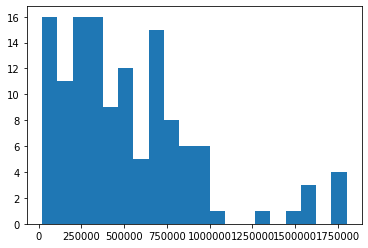

In [11]:
# Histogram for 'SOLD PRICE'
plt.hist(ipl_auction_df['SOLD PRICE'], bins = 20)

*The Histogram shows that SOLD PRICE is right skewed. Most players are auctioned at low price range of 250000 and 500000, whereas few players are paid very highly, more than 1 million dollars.*

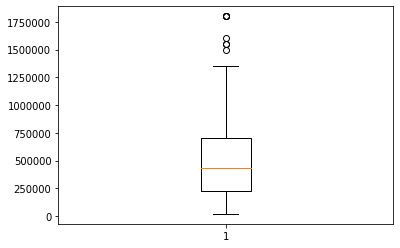

In [12]:
# BOX Plot for the outcome variable 'SOLD PRICE'
box = plt.boxplot(ipl_auction_df['SOLD PRICE'])

In [13]:
# minimum and maximum auction price 
[item.get_ydata()[0] for item in box['caps']]

[20000.0, 1350000.0]

*Here the minimum auction price offered is 20,000 and maximum price is 13,50,000.*

In [14]:
# Players auctioned at 'SOLD PRICE', whiche seems to be outliers 
ipl_auction_df[ipl_auction_df['SOLD PRICE'] > 1350000.0][['PLAYER NAME','PLAYING ROLE','SOLD PRICE']]

,PLAYER NAME,PLAYING ROLE,SOLD PRICE
15,"Dhoni, MS",W. Keeper,1500000
23,"Flintoff, A",Allrounder,1550000
50,"Kohli, V",Batsman,1800000
83,"Pietersen, KP",Batsman,1550000
93,"Sehwag, V",Batsman,1800000
111,"Tendulkar, SR",Batsman,1800000
113,"Tiwary, SS",Batsman,1600000
127,Yuvraj Singh,Batsman,1800000


*The SOLD PRICE amount for the above players seems to be outlier considering what is paid to other players.*

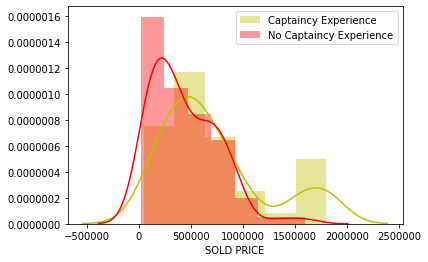

In [15]:
# 'SOLD PRICE' of players with and without 'CAPTAINCY EXP' 
sn.distplot(ipl_auction_df[ipl_auction_df['CAPTAINCY EXP']==1]['SOLD PRICE'],
           color = 'y',
           label ='Captaincy Experience')
sn.distplot(ipl_auction_df[ipl_auction_df['CAPTAINCY EXP']==0]['SOLD PRICE'],
           color = 'r',
           label ='No Captaincy Experience')
plt.legend();

*Players with captaincy experience seem to be paid higher.*

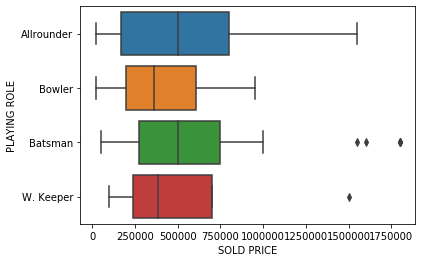

In [16]:
# 'SOLD PRICE' for each 'PLAYING ROLE'
sn.boxplot(x = 'SOLD PRICE',y = 'PLAYING ROLE', data = ipl_auction_df)

* 1. The median SOLD PRICE for allrounder and Batsman are higher than Bowler and Wicket Keeper.
* 2. All rounders who are paid more than 1,35,0000 USD are not considered outliers. Allrounders have relatively high variance.
* 3. There are outliers in batsman and wicket keeper category. we have already found that MS Dhoni is an outlier in the wicket      keeper category.

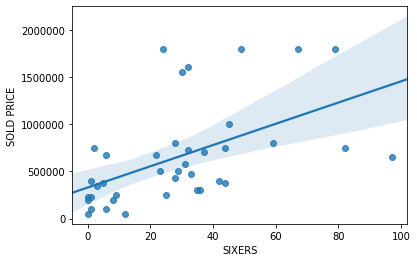

In [17]:
# 'SOLD PRICE' of batsman on the basis of 'SIXERS'
ipl_batsman_df = ipl_auction_df[ipl_auction_df['PLAYING ROLE']=='Batsman']
sn.regplot( x = 'SIXERS', y = 'SOLD PRICE', data = ipl_batsman_df)

*There is a positive correlation between number of sixes hit by a batsman and the SOLD PRICE.*

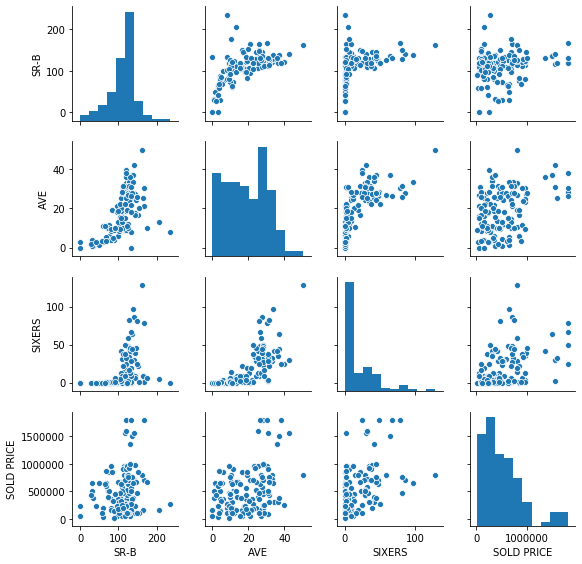

In [18]:
# 4 variables which can be influential features in determining the SOLD PRICE of batsman 
# SR-B(Batting Strike Rate), AVE(Average runs scored by a Batsman), SIXERS, SOLD PRICE - influential features
influential_features = ['SR-B','AVE','SIXERS','SOLD PRICE']
sn.pairplot(ipl_auction_df[influential_features], size = 2)

*AVE and SIXERS seem to be highly correlated with SOLD PRICE compared to SR-B.*

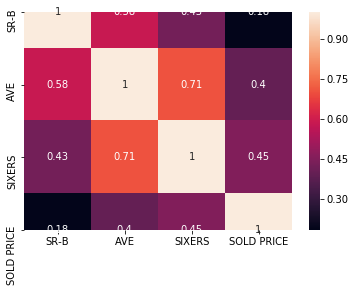

In [19]:
# Correlations between the influential features
sn.heatmap(ipl_auction_df[influential_features].corr(), annot = True)

*AVE and SIXER show positive correlation, While SOLD PRICE and SR-B are not strongly correlated.*

## Model Building

We will build a model to understand what features of players are influencing the *SOLD PRICE* or predict the player's auction prices in future. However, All columns are not features. For example, SL.NO. is just a serial number and cannot be considered a feature of the player. So, *Base Price* can also be removed.

We will create a variable *X_feature* which will contain a list of features that we will finally use for building the model and ignore rest of the columns of the DataFrame.

In [20]:
X_features = ipl_auction_df.columns

In [21]:
X_features = ['AGE', 'COUNTRY','PLAYING ROLE','T-RUNS','T-WKTS','ODI-RUNS-S','ODI-SR-B','ODI-WKTS','ODI-SR-BL','CAPTAINCY EXP','RUNS-S','HS','AVE','SR-B','SIXERS','RUNS-C','WKTS','AVE-BL','ECON','SR-BL']

## Encoding Categorical Features

Categorical variables need to be encoded using dummy variables before incorporating them in the regression model. Most of the features in the dataset are numerical (ratio scale) whereas features such as *AGE , COUNTRY, PLAYING ROLE , CAPTAINCY EXP* are categorical and hence need to be encoded before building the model.

In [22]:
categorical_features = ['AGE','COUNTRY','PLAYING ROLE','CAPTAINCY EXP']

In [23]:
ipl_auction_encoded_df = pd.get_dummies(ipl_auction_df[X_features], columns = categorical_features, drop_first = True)

In [24]:
ipl_auction_encoded_df.columns

Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL', 'AGE_2', 'AGE_3', 'COUNTRY_BAN', 'COUNTRY_ENG',
       'COUNTRY_IND', 'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA', 'COUNTRY_SL',
       'COUNTRY_WI', 'COUNTRY_ZIM', 'PLAYING ROLE_Batsman',
       'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper', 'CAPTAINCY EXP_1'],
      dtype='object')

In [25]:
# reassigning the new features to the variable 'X_features'
X_features = ipl_auction_encoded_df.columns

## Splitting the Dataset into Train and Validation Sets

In [26]:
import statsmodels.api as sm
X = sm.add_constant(ipl_auction_encoded_df)
Y = ipl_auction_df['SOLD PRICE']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
train_X, test_X, train_y, test_y = train_test_split(X, Y, train_size=0.80, random_state=42)

## Building the model on the Training Dataset

In [29]:
# ipl_model_1
ipl_model_1 = sm.OLS(train_y,train_X).fit()
ipl_model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                     OLS                     Adj. R-squared:            0.362     
Dependent Variable:        SOLD PRICE              AIC:                       2965.2841 
Date:                      2019-09-07 09:24        BIC:                       3049.9046 
No. Observations:          104                     Log-Likelihood:            -1450.6   
Df Model:                  31                      F-statistic:               2.883     
Df Residuals:              72                      Prob (F-statistic):        0.000114  
R-squared:                 0.554                   Scale:                     1.1034e+11
----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------------------
const                   375827.1991 228849.9306  1.6422 0.1049  -80376.7996  832031.1978
T-RUNS                     -53.7890     32.7172 -1.6441 0.1045    -119.0096      11.4316
T-WKTS                    -132.5967    609.7525 -0.2175 0.8285   -1348.1162    1082.9228
ODI-RUNS-S                  57.9600     31.5071  1.8396 0.0700      -4.8482     120.7681
ODI-SR-B                  -524.1450   1576.6368 -0.3324 0.7405   -3667.1130    2618.8231
ODI-WKTS                   815.3944    832.3883  0.9796 0.3306    -843.9413    2474.7301
ODI-SR-BL                 -773.3092   1536.3334 -0.5033 0.6163   -3835.9338    2289.3154
RUNS-S                     114.7205    173.3088  0.6619 0.5101    -230.7643     460.2054
HS                       -5516.3354   2586.3277 -2.1329 0.0363  -10672.0855    -360.5853
AVE                      21560.2760   7774.2419  2.7733 0.0071    6062.6080   37057.9439
SR-B                     -1324.7218   1373.1303 -0.9647 0.3379   -4062.0071    1412.5635
SIXERS                    4264.1001   4089.6000  1.0427 0.3006   -3888.3685   12416.5687
RUNS-C                      69.8250    297.6697  0.2346 0.8152    -523.5687     663.2187
WKTS                      3075.2422   7262.4452  0.4234 0.6732  -11402.1778   17552.6622
AVE-BL                    5182.9335  10230.1581  0.5066 0.6140  -15210.5140   25576.3810
ECON                     -6820.7781  13109.3693 -0.5203 0.6045  -32953.8282   19312.2721
SR-BL                    -7658.8094  14041.8735 -0.5454 0.5871  -35650.7726   20333.1539
AGE_2                  -230767.6463 114117.2005 -2.0222 0.0469 -458256.1279   -3279.1648
AGE_3                  -216827.0808 152246.6232 -1.4242 0.1587 -520325.1772   86671.0155
COUNTRY_BAN            -122103.5196 438719.2796 -0.2783 0.7816 -996674.4194  752467.3801
COUNTRY_ENG             672410.7654 238386.2220  2.8207 0.0062  197196.5172 1147625.0135
COUNTRY_IND             155306.4011 126316.3449  1.2295 0.2229  -96500.6302  407113.4325
COUNTRY_NZ              194218.9120 173491.9293  1.1195 0.2667 -151630.9280  540068.7521
COUNTRY_PAK              75921.7670 193463.5545  0.3924 0.6959 -309740.7804  461584.3143
COUNTRY_SA               64283.3894 144587.6773  0.4446 0.6579 -223946.8775  352513.6563
COUNTRY_SL               17360.1530 176333.7497  0.0985 0.9218 -334154.7526  368875.0586
COUNTRY_WI               10607.7792 230686.7892  0.0460 0.9635 -449257.9303  470473.4887
COUNTRY_ZIM            -145494.4793 401505.2815 -0.3624 0.7181 -945880.6296  654891.6710
PLAYING ROLE_Batsman     75724.7643 150250.0240  0.5040 0.6158 -223793.1844  375242.7130
PLAYING ROLE_Bowler      15395.8752 126308.1272  0.1219 0.9033 -236394.7744  267186.5249
PLAYING ROLE_W. Keeper  -71358.6280 213585.7444 -0.3341 0.7393 -497134.0278  354416.7718
CAPTAINCY EXP_1         164113.3972 123430.6353  1.3296 0.1878  -81941.0772  410167.8716
----------------------------------------------------------------

*From our model output as per the p-value (<0.05), only the features HS,AGE_2,AVE and COUNTRY_ENG have come out significant. The model says none of the other features are influencing SOLD PRICE(at a significance value of 0.05). This is not very intuitive and could be a result of multi-collinearity effect of variables.*

## Variance Inflation Factor (VIF)

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def get_vif_factors(X):
    X_matrix  = X.as_matrix()
    vif = [variance_inflation_factor(X_matrix,i) for i in range(X_matrix.shape[1])]
    vif_factors = pd.DataFrame()
    vif_factors['column'] = X.columns
    vif_factors['VIF'] = vif
    return vif_factors
vif_factors = get_vif_factors(X[X_features])
vif_factors

,column,VIF
0,T-RUNS,12.612694
1,T-WKTS,7.679284
2,ODI-RUNS-S,16.426209
3,ODI-SR-B,13.829376
4,ODI-WKTS,9.951800
5,ODI-SR-BL,4.426818
6,RUNS-S,16.135407
7,HS,22.781017
8,AVE,25.226566
9,SR-B,21.576204


## Checking Correlation of Columns with Large VIFs

We will generate a correlation heatmap to understand the correlation between independent variables which can be used to decide which features to include in the model. We will first select the features that have VIF value of more than 4.

Text(0.5, 1, 'Heatmap depicting correlation between features')

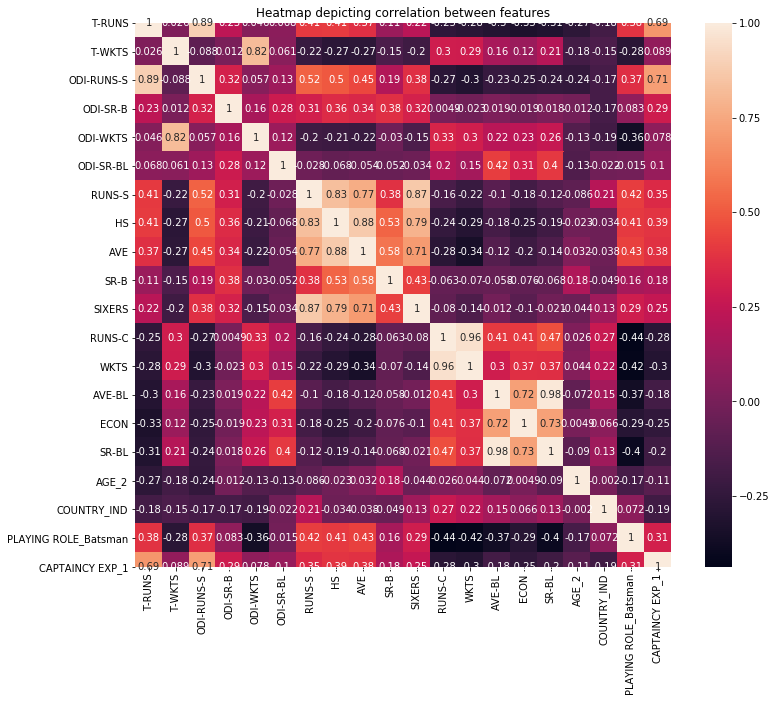

In [31]:
columns_with_large_vif = vif_factors[vif_factors.VIF > 4].column
plt.figure( figsize = (12,10))
sn.heatmap(X[columns_with_large_vif].corr(), annot = True)
plt.title('Heatmap depicting correlation between features')

* *T-RUNS and ODI-RUNS-S are highly correlelated, whereas ODI-WKTS and T-WKTS are highly correlated.*
* *Batsman features like RUNS-S,HS,AVE,SIXERS are highly correlated, while bowler's features like AVE-BL,ECON and SR-BL are highly correlated.*

To Avoid multi-collinearity , we will keep only one column from each group of highly correlated variables and remove the others.

In [32]:
# Features to be removed
columns_to_be_removed = ['T-RUNS','T-WKTS','RUNS-S','HS','AVE','RUNS-C','SR-B','AVE-BL','ECON','ODI-SR-B','ODI-RUNS-S','AGE_2','SR-BL']
# New features
X_new_features = list(set(X_features) - set(columns_to_be_removed))
get_vif_factors(X[X_new_features])

,column,VIF
0,SIXERS,2.397409
1,ODI-SR-BL,2.822148
2,AGE_3,1.779861
3,WKTS,2.883101
4,COUNTRY_BAN,1.094293
5,COUNTRY_IND,3.144668
6,COUNTRY_PAK,1.334773
7,COUNTRY_SA,1.416657
8,PLAYING ROLE_W. Keeper,1.900941
9,PLAYING ROLE_Batsman,2.680207


*The VIFs on the final set of variables indicate that there is no multi-collinearity present any more(VIF values are less than 4).*

## Building a New Model after Removing Multi-Collinearity

In [33]:
train_X = train_X[X_new_features]
# model 2
ipl_model_2 = sm.OLS(train_y,train_X).fit()
ipl_model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                      OLS                Adj. R-squared (uncentered):   0.728     
Dependent Variable:         SOLD PRICE         AIC:                           2965.1080 
Date:                       2019-09-07 09:24   BIC:                           3012.7070 
No. Observations:           104                Log-Likelihood:                -1464.6   
Df Model:                   18                 F-statistic:                   16.49     
Df Residuals:               86                 Prob (F-statistic):            1.13e-20  
R-squared (uncentered):     0.775              Scale:                         1.2071e+11
----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------------------
SIXERS                    7862.1259   2086.6101  3.7679 0.0003    3714.0824   12010.1694
ODI-SR-BL                  909.0021   1267.4969  0.7172 0.4752   -1610.6983    3428.7026
AGE_3                    -8950.6659  98041.9325 -0.0913 0.9275 -203851.5772  185950.2453
WKTS                      2431.8988   2105.3524  1.1551 0.2512   -1753.4033    6617.2008
COUNTRY_BAN            -108758.6040 369274.1916 -0.2945 0.7691 -842851.4010  625334.1930
COUNTRY_IND             282829.8091  96188.0292  2.9404 0.0042   91614.3356  474045.2827
COUNTRY_PAK             122810.2480 159600.8063  0.7695 0.4437 -194465.6541  440086.1502
COUNTRY_SA              108735.9086 115092.9596  0.9448 0.3474 -120061.3227  337533.1399
PLAYING ROLE_W. Keeper  -55121.9240 169922.5271 -0.3244 0.7464 -392916.7280  282672.8801
PLAYING ROLE_Batsman    121382.0570 106685.0356  1.1378 0.2584  -90700.7746  333464.8886
COUNTRY_NZ              142968.8843 151841.7382  0.9416 0.3491 -158882.5009  444820.2695
ODI-WKTS                   772.4088    470.6354  1.6412 0.1044    -163.1834    1708.0009
COUNTRY_ENG             682934.7166 216150.8279  3.1595 0.0022  253241.0920 1112628.3411
PLAYING ROLE_Bowler     -18315.4968 106035.9664 -0.1727 0.8633 -229108.0215  192477.0279
COUNTRY_SL               55912.3398 142277.1829  0.3930 0.6953 -226925.3388  338750.0184
CAPTAINCY EXP_1         208376.6957  98128.0284  2.1235 0.0366   13304.6315  403448.7600
COUNTRY_WI              -22234.9315 213050.5847 -0.1044 0.9171 -445765.4766  401295.6135
COUNTRY_ZIM             -67977.6781 390859.9289 -0.1739 0.8623 -844981.5006  709026.1444
----------------------------------------------------------------------------------------
Omnibus:                       8.635               Durbin-Watson:                  2.252
Prob(Omnibus):                 0.013               Jarque-Bera (JB):               8.345
Skew:                          0.623               Prob(JB):                       0.015
Kurtosis:                      3.609               Condition No.:                  1492 
========================================================================================
* The condition number is large (1e+03). This might indicate             strong
multicollinearity or other numerical problems.
"""

*Based on the p-values, only the variables COUNTRY_IND, COUNTRY_ENG, SIXERS, CAPTAINCY EXP_1 have come out statistically significant. So, the features that decide the SOLD PRICE are*

* *Whether the players belong to India or England(that is origin country of the player).*
* *How many sixes has the player hit in previous versions of the IPL? How many wickets have been taken by the player in ODIs?*
* *Whether the player has any previous captaincy experience or not.*

Building a new model with the significant variables

In [34]:
significant_vars = ['COUNTRY_IND','COUNTRY_ENG','SIXERS','CAPTAINCY EXP_1']

train_X = train_X[significant_vars]

ipl_model_3 = sm.OLS(train_y, train_X).fit()
ipl_model_3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.704     
Dependent Variable:     SOLD PRICE       AIC:                         2961.8089 
Date:                   2019-09-07 09:24 BIC:                         2972.3864 
No. Observations:       104              Log-Likelihood:              -1476.9   
Df Model:               4                F-statistic:                 62.77     
Df Residuals:           100              Prob (F-statistic):          1.97e-26  
R-squared (uncentered): 0.715            Scale:                       1.3164e+11
--------------------------------------------------------------------------------
                     Coef.      Std.Err.    t    P>|t|     [0.025      0.975]   
--------------------------------------------------------------------------------
COUNTRY_IND       387890.2538  63007.1511 6.1563 0.0000 262885.8606  512894.6471
COUNTRY_ENG       731833.6386 214164.4988 3.4172 0.0009 306937.3727 1156729.9045
SIXERS              8637.8344   1675.1313 5.1565 0.0000   5314.4216   11961.2472
CAPTAINCY EXP_1   359725.2741  74930.3460 4.8008 0.0000 211065.6018  508384.9463
--------------------------------------------------------------------------------
Omnibus:                   1.130             Durbin-Watson:                2.238
Prob(Omnibus):             0.568             Jarque-Bera (JB):             0.874
Skew:                      0.223             Prob(JB):                     0.646
Kurtosis:                  3.046             Condition No.:                165  
================================================================================

"""

* *All the variables are statistically significant, as p-value is less than 0.05%.*
* *The overall model is significant as the p-value for the F-statistics is also less than 0.05%.*
* *The model can explain 71.5% of the variance in SOLD PRICE as the R-squared value is 0.715 and the adjusted R-squared value is 0.704.*

## Predictions on  Test Data

In [35]:
pred_y = ipl_model_3.predict(test_X[train_X.columns])

## RMSE

In [36]:
from sklearn import metrics

In [37]:
np.sqrt(metrics.mean_squared_error(pred_y,test_y))

333693.41475245584

## R-squared Value

In [38]:
metrics.r2_score(pred_y, test_y)

0.3058148616700983

*The accuracy(R-squared) value on the validation set(0.44) is quite low compared to the accuracy reported by the model on the training dataset (0.751). This could be a sign of model over-fitting.*

## Improving the Model

In [39]:
X = ipl_auction_encoded_df
Y = ipl_auction_df['SOLD PRICE']

## Standardization of X and Y

In [40]:
from sklearn.preprocessing import StandardScaler
# Standardize all the feature columns
X_scaler = StandardScaler()
X_scaled = X_scaler.fit_transform(X)
# Standardizing Y explicitly by subtracting mean and dividing by standard deviation
Y  = (Y-Y.mean())/Y.std()

## Splitting the Dataset into Train and Test

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

## Training the Model

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [44]:
linreg.coef_

array([-0.43539611, -0.04632556,  0.50840867, -0.03323988,  0.2220377 ,
       -0.05065703,  0.17282657, -0.49173336,  0.58571405, -0.11654753,
        0.24880095,  0.09546057,  0.16428731,  0.26400753, -0.08253341,
       -0.28643889, -0.26842214, -0.21910913, -0.02622351,  0.24817898,
        0.18760332,  0.10776084,  0.04737488,  0.05191335,  0.01235245,
        0.00547115, -0.03124706,  0.08530192,  0.01790803, -0.05077454,
        0.18745577])

The sign of the coefficients indicates positive or negative effect on a player's SOLD PRICE. We will store the beta coefficients and respective column names in a DataFrame and then sort the coefficient values in descending order to observe the effects.

In [45]:
# The dataframe has two columns to store feature name and the corresponding coefficient values
columns_coef_df = pd.DataFrame({'columns': ipl_auction_encoded_df.columns, 'coef':linreg.coef_})
# Sorting the features by coefficient values in descending order
sorted_coef_vals = columns_coef_df.sort_values('coef', ascending = False)

Plotting the coefficients values in descending order

Text(0, 0.5, 'Features')

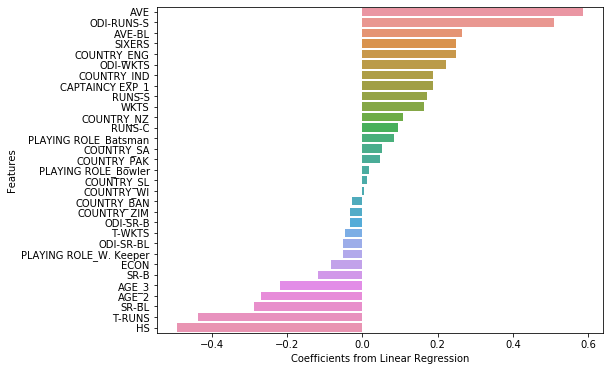

In [46]:
plt.figure(figsize = (8,6))
sn.barplot(x = 'coef', y = 'columns', data = sorted_coef_vals)
plt.xlabel('Coefficients from Linear Regression')
plt.ylabel('Features')

* *AVE,ODI-RUNS,SIXERS are top three highly influential features which determine the player's SOLD PRICE.*
* *Higher ECON,SR-B and AGE have negative effects on SOLD PRICE.*
* *Higher test runs (T-Runs) and Highest score (HS) have negative effect on the SOLD PRICE.*
* *Few Coefficients have counter-intuitive sign that could be due to multi-collinearity. For example, we expect SR-B(Batting strike rate) to have a positive effect on the SOLD PRICE.*

## RMSE

We will develop an utility method *get_train_test_rmse()* to calculate and print the RMSE of train and test sets for comparision. It will take the model as parameter.

In [47]:
from sklearn import metrics

In [48]:
def get_train_test_rmse(model):
    # Predicting on training dataset
    y_train_pred = model.predict(X_train)
    # rmse_train
    rmse_train =  round(np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)),3)
    
    
    # Predicting on test dataset
    y_test_pred = model.predict(X_test)
    #rmse_test
    rmse_test =  round(np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)),3)
    print('train:', rmse_train, 'test:',rmse_test)

In [49]:
get_train_test_rmse(linreg)

train: 0.679 test: 0.749


*RMSE on the training set is 0.679, while it is 0.749 on the test set. A good model that generalizes well needs to have a very similar error on training and test sets. Large difference indicates that the model is overfitting to the training set.*

## Applying Regularization

## 1.  Ridge Regression

In [50]:
# Importing Ridge Regression
from sklearn.linear_model import Ridge

# Applying alpha = 1 and running the algorithm for maximum of 500 iterations
ridge = Ridge(alpha = 1 , max_iter = 500)
ridge.fit(X_train, y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
   random_state=None, solver='auto', tol=0.001)

In [51]:
get_train_test_rmse(ridge)

train: 0.68 test: 0.724


*The difference in RMSE on train and test has reduced because of penalty effect. The difference can be reduced by applying stronger penalty.*

In [52]:
ridge = Ridge(alpha = 2.0, max_iter = 1000)
ridge.fit(X_train, y_train)
get_train_test_rmse(ridge)

train: 0.682 test: 0.706


*The difference in model accuracy on training and test has reduced.*

## 2. Lasso Regression

In [53]:
# Importing the Lasso Regression
from sklearn.linear_model import Lasso

# Applying alpha = 1 and running the algorithm for maximum of 500 iterations
lasso = Lasso(alpha = 0.01, max_iter = 500)
lasso.fit(X_train, y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=500,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [54]:
get_train_test_rmse(lasso)

train: 0.688 test: 0.698


*The model is not overfitting and the difference between train RMSE and test RMSE is very small.*

Lasso reduces some of the coefficient values to 0, which indicates that these features are not necessary for explaining the variance in the outcome variable.We will store the feature names, coefficient values in a DataFrame and then filter the features with zero coefficients.

In [55]:
# Storing the feature names and coefficient values in a DataFrame
lasso_coef_df = pd.DataFrame({'columns': ipl_auction_encoded_df.columns, 'coef' : lasso.coef_})

In [56]:
# Filtering out coefficients with zeroes
lasso_coef_df[lasso_coef_df.coef == 0]

,columns,coef
1,T-WKTS,-0.0
3,ODI-SR-B,-0.0
13,AVE-BL,-0.0
28,PLAYING ROLE_Bowler,0.0


*The Lasso regression indicates that the features listed under 'columns' are not influencing factors for predicting the SOLD PRICE as the respective coefficients are 0.0*

## 3. Elastic Net Regression

In [57]:
from sklearn.linear_model import ElasticNet

In [58]:
enet = ElasticNet(alpha = 1.01 , l1_ratio = 0.001 ,max_iter = 500)
enet.fit(X_train,y_train)
get_train_test_rmse(enet)

train: 0.789 test: 0.665


#### From the above regularization technique's we can say, L2 (Ridge) regression and Elastic Net   regression didn't improve the model performance much. But on applying L1(Lasso) regression it seems to deal with the overfitting problem efficiently and helps improving the model performance also.